In [1]:
!pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [3]:
import os
os.getcwd()

'/gdrive'

In [4]:
os.chdir("MyDrive/Autism_code")
!pwd

/gdrive/MyDrive/Autism_code


In [5]:
import numpy as np
import pandas as pd

In [6]:
df=pd.read_excel("Kinetics_autism.xlsx")

In [35]:
result = df.iloc[:, 3:7]
result

ANKLE Moment_X_MAX_ST..35.70.  ANKLE Moment_X_MAX_ST_time..35.70.  \
0                         0.80297                              44.872   
1                         0.89376                              48.101   
2                         0.98321                              52.778   
3                         0.99459                              54.745   
4                         1.06840                              45.783   
..                            ...                                 ...   
75                        1.34840                              47.959   
76                        1.49850                              46.739   
77                        1.28600                              48.889   
78                        1.03280                              44.944   
79                        1.01850                              45.455   

    ANKLE Power_X_MAX_ST..35.70.  ANKLE Power_X_MAX_ST_time..35.70.  
0                         1.5515                             51.282  
1                         2.9761                             54.430  
2                         1.0882                             58.333  
3                         1.3389                             60.584  
4                         2.6203                             53.012  
..                           ...                                ...  
75                        3.4312                             55.102  
76                        4.0606                             53.261  
77                        3.9401                             54.444  
78                        2.0882                             52.809  
79                        1.9157                             53.409  

[80 rows x 4 columns]

In [36]:
y=df.iloc[:,1]
y

0      Autism
1      Autism
2      Autism
3      Autism
4      Autism
       ...   
75    Control
76    Control
77    Control
78    Control
79    Control
Name: Group, Length: 80, dtype: object

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print("y.shape = ", y.shape)
print(type(y))
print(y)

y.shape =  (80,)
<class 'numpy.ndarray'>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
cols=result.columns
sc = StandardScaler()
scaled = pd.DataFrame(sc.fit_transform(result), columns=cols)

In [39]:
from sklearn.model_selection import LeaveOneOut
loocv = LeaveOneOut()

In [49]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', verbose=False, C=90)

In [42]:
!pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
# Define the Sequential Feature Selection class
# Below is the code for applying Forward Feature Selection
# Forward SFS
# Backward SFS
# Bi-Directional SFS
# https://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs = SFS(estimator=svm, 
            k_features=(1, 15),
            forward=True, floating=False,
            verbose=2,
            scoring=('accuracy'),
            cv=loocv,
            n_jobs=-1)

In [51]:
from sklearn.svm import SVC
svm_classifier = SVC()

# # Define the Hyper-Parameters on which GridSearch needs to be done
# C = [1.0, 1.5, 2.0, 2.5, 3.0]
# kernel = ['poly', 'rbf', 'sigmoid']
# degree = [2,3,4,5]
# tol = [1e-2, 1e-3, 1e-4, 1e-5]

# param_grid = dict(C=C, kernel=kernel, degree=degree, tol=tol)

param_grid = [
              {'C': [0.001, 0.2, 0.3, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 5, 8, 90], 
               #'gamma': ['scale', 'auto', 0.01, 0.03, 0.04, 0.043, 0.045, 0.048, 0.05, 0.053, 0.055, 0.058, 0.06, 0.08, 0.0001, 0.001, 0.1, 1, 10], 
               'tol':[1e-2, 1e-3, 1e-4, 1e-5], 
               'kernel': ['linear']
              }#linearSVM
]

In [52]:
from sklearn.model_selection import GridSearchCV
gridSearch = GridSearchCV(estimator=svm, 
                          param_grid=param_grid, 
                          scoring='accuracy',
                          n_jobs=-1,
                          cv=loocv, # uses Leave One Out CV
                          refit=True, verbose=1)

In [53]:
algorith_you_are_using = 'Linear SVM' 

In [54]:
segments = {
    'Kinetics(Ankle)' :result
#     'Cal_Met_Angle' : df.loc[:, 'Cal_Met_Angle_X_HS' : 'Cal_Met_Angle_Z_MIN_time'],
#     'Cal_Mid_Angle' : df.loc[:, 'Cal_Mid_Angle_X_HS' : 'Cal_Mid_Angle_Z_MIN_time'],
#     'Mid_Met_Angle' : df.loc[:, 'Mid_Met_Angle_X_HS' : 'Mid_Met_Angle_Z_MIN_time'],
#     'Sha_Cal_Angle' : df.loc[:, 'Sha_Cal_Angle_X_HS' : 'Sha_Cal_Angle_Z_MIN_time'],
#     'Sha_Foot_Angle' : df.loc[:, 'Sha_Foot_Angle_X_HS' : 'Sha_Foot_Angle_Z_MIN_time']
}

In [48]:
'''svm = SVC(kernel='linear', verbose=False, C=60)'''
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
from utils import *

# current_dt = datetime.datetime.now(pytz.timezone('Asia/Calcutta'))
# date_time_str =  str(current_dt.day) + "_" + str(current_dt.month) + "_" + str(current_dt.year) + "_" + str(current_dt.hour) + "_" + str(current_dt.minute)

# Automatically Writing the results into the below text file
# file = open("./new_07_08/" + date_time_str + "_results_" + algorith_you_are_using + ".txt", "a")
# print("File Name: " + "./new_07_08/" + date_time_str + "_results_" + algorith_you_are_using + ".txt")
# file.write("Forward-SFS ({}, LOOCV, Accuracy) + GridSearch ({}, LOOCV, Accuracy)\n\n".format(algorith_you_are_using, algorith_you_are_using))
# file.write("Algorithm, Segment, Accuracy, Specificity, Sensitivity, NPV, PPV, Likelihood Ratio, F1, MCC\n")
# file.write("svm = SVC(kernel='rbf', verbose=False, C=90)")

for (key, value) in segments.items():
  print("Running: ", key)

  X = value.values
  X = sc.fit_transform(X) # Standard Scaler
  print("X.shape = ", X.shape)

  # Apply SFS
  sfs.k_features = (1, X.shape[1])
  sfs.fit(X, y)
  #print("sfs.k_score_ = ", sfs.k_score_)
  #print("sfs.k_feature_idx_ = ", sfs.k_feature_idx_)
  
  # Apply Grid Search on the Most Significant Features
  X = sfs.transform(X)
  print("[After SFS] X.shape = ", X.shape)

  search_results = gridSearch.fit(X, y)
  
  # Get the Best Classfier (Best Parameters) after Grid Search
  best_classifier = search_results.best_estimator_
  print("best_classifier = ", best_classifier)
  
  # Apply LOOCV to get classification scores
  y_true_list, y_pred_list = [], []
  for train_idx, test_idx in loocv.split(X, y):
      x_train, y_train = X[train_idx], y[train_idx]
      x_test, y_test = X[test_idx], y[test_idx]
      
      best_classifier.fit(x_train, y_train)
      
      y_pred = best_classifier.predict(x_test)

      y_true_list.append(y_test[:])
      y_pred_list.append(y_pred[:])

  print("{}, {}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}\n".format(algorith_you_are_using, 
                                                                                          key, 
                                                                                          accuracy_score(y_true_list, y_pred_list),
                                                                                          get_specificity(y_true_list, y_pred_list),
                                                                                          get_sensitivity(y_true_list, y_pred_list),
                                                                                          get_NPV(y_true_list, y_pred_list),
                                                                                          get_PPV(y_true_list, y_pred_list),
                                                                                          get_PLR(y_true_list, y_pred_list),
                                                                                          f1_score(y_true_list, y_pred_list, labels=[0, 1]),
                                                                                          get_MCC(y_true_list, y_pred_list)                                                                                               
                                                                                          ))
  # file.write("{}, {}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}\n".format(algorith_you_are_using, 
  #                                                                                             key, 
  #                                                                                             accuracy_score(y_true_list, y_pred_list),
  #                                                                                             get_specificity(y_true_list, y_pred_list),
  #                                                                                             get_sensitivity(y_true_list, y_pred_list),
  #                                                                                             get_NPV(y_true_list, y_pred_list),
  #                                                                                             get_PPV(y_true_list, y_pred_list),
  #                                                                                             get_PLR(y_true_list, y_pred_list),
  #                                                                                             f1_score(y_true_list, y_pred_list, labels=[0, 1]),
  #                                                                                             get_MCC(y_true_list, y_pred_list)                                                                                               
  #                                                                                              ))
  # clear the writing buffer
  # file.flush()
  print("##############################################################")

# file.close()

Running:  Kinetics(Ankle)
X.shape =  (80, 4)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.7s finished

[2022-08-25 23:05:32] Features: 1/4 -- score: 0.525[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.8s finished

[2022-08-25 23:05:33] Features: 2/4 -- score: 0.55[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.4s finished

[2022-08-25 23:05:35] Features: 3/4 -- score: 0.525[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.0s finished

[2022-08-25 23:05:36] Features: 4/4 -- score: 0.525

[After SFS] X.shape =  (80, 2)
Fitting 80 folds for each of 52 candidates, totalling 4160 fits
best_classifier =  SVC(C=90, kernel='linear', tol=0.01)
Linear SVM, Kinetics(Ankle), 0.550, 0.474, 0.619, 0.529, 0.565, 1.176, 0.591, 0.094

##############################################################


In [55]:
'''svm = SVC(kernel='linear', verbose=False, C=90)'''
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
from utils import *

# current_dt = datetime.datetime.now(pytz.timezone('Asia/Calcutta'))
# date_time_str =  str(current_dt.day) + "_" + str(current_dt.month) + "_" + str(current_dt.year) + "_" + str(current_dt.hour) + "_" + str(current_dt.minute)

# Automatically Writing the results into the below text file
# file = open("./new_07_08/" + date_time_str + "_results_" + algorith_you_are_using + ".txt", "a")
# print("File Name: " + "./new_07_08/" + date_time_str + "_results_" + algorith_you_are_using + ".txt")
# file.write("Forward-SFS ({}, LOOCV, Accuracy) + GridSearch ({}, LOOCV, Accuracy)\n\n".format(algorith_you_are_using, algorith_you_are_using))
# file.write("Algorithm, Segment, Accuracy, Specificity, Sensitivity, NPV, PPV, Likelihood Ratio, F1, MCC\n")
# file.write("svm = SVC(kernel='rbf', verbose=False, C=90)")

for (key, value) in segments.items():
  print("Running: ", key)

  X = value.values
  X = sc.fit_transform(X) # Standard Scaler
  print("X.shape = ", X.shape)

  # Apply SFS
  sfs.k_features = (1, X.shape[1])
  sfs.fit(X, y)
  #print("sfs.k_score_ = ", sfs.k_score_)
  #print("sfs.k_feature_idx_ = ", sfs.k_feature_idx_)
  
  # Apply Grid Search on the Most Significant Features
  X = sfs.transform(X)
  print("[After SFS] X.shape = ", X.shape)

  search_results = gridSearch.fit(X, y)
  
  # Get the Best Classfier (Best Parameters) after Grid Search
  best_classifier = search_results.best_estimator_
  print("best_classifier = ", best_classifier)
  
  # Apply LOOCV to get classification scores
  y_true_list, y_pred_list = [], []
  for train_idx, test_idx in loocv.split(X, y):
      x_train, y_train = X[train_idx], y[train_idx]
      x_test, y_test = X[test_idx], y[test_idx]
      
      best_classifier.fit(x_train, y_train)
      
      y_pred = best_classifier.predict(x_test)

      y_true_list.append(y_test[:])
      y_pred_list.append(y_pred[:])

  print("{}, {}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}\n".format(algorith_you_are_using, 
                                                                                          key, 
                                                                                          accuracy_score(y_true_list, y_pred_list),
                                                                                          get_specificity(y_true_list, y_pred_list),
                                                                                          get_sensitivity(y_true_list, y_pred_list),
                                                                                          get_NPV(y_true_list, y_pred_list),
                                                                                          get_PPV(y_true_list, y_pred_list),
                                                                                          get_PLR(y_true_list, y_pred_list),
                                                                                          f1_score(y_true_list, y_pred_list, labels=[0, 1]),
                                                                                          get_MCC(y_true_list, y_pred_list)                                                                                               
                                                                                          ))
  # file.write("{}, {}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}\n".format(algorith_you_are_using, 
  #                                                                                             key, 
  #                                                                                             accuracy_score(y_true_list, y_pred_list),
  #                                                                                             get_specificity(y_true_list, y_pred_list),
  #                                                                                             get_sensitivity(y_true_list, y_pred_list),
  #                                                                                             get_NPV(y_true_list, y_pred_list),
  #                                                                                             get_PPV(y_true_list, y_pred_list),
  #                                                                                             get_PLR(y_true_list, y_pred_list),
  #                                                                                             f1_score(y_true_list, y_pred_list, labels=[0, 1]),
  #                                                                                             get_MCC(y_true_list, y_pred_list)                                                                                               
  #                                                                                              ))
  # clear the writing buffer
  # file.flush()
  print("##############################################################")

# file.close()

Running:  Kinetics(Ankle)
X.shape =  (80, 4)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished

[2022-08-25 23:06:09] Features: 1/4 -- score: 0.525[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s finished

[2022-08-25 23:06:10] Features: 2/4 -- score: 0.55[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.8s finished

[2022-08-25 23:06:10] Features: 3/4 -- score: 0.525[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.6s finished

[2022-08-25 23:06:11] Features: 4/4 -- score: 0.525

[After SFS] X.shape =  (80, 2)
Fitting 80 folds for each of 52 candidates, totalling 4160 fits
best_classifier =  SVC(C=90, kernel='linear', tol=0.01)
Linear SVM, Kinetics(Ankle), 0.550, 0.474, 0.619, 0.529, 0.565, 1.176, 0.591, 0.094

##############################################################


In [56]:
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
from utils import *

X = result.values
X = sc.fit_transform(X) # Standard Scaler

print("X.shape = ", X.shape)
print("y.shape = ", y.shape)

X.shape =  (80, 4)
y.shape =  (80,)


In [57]:
# define the classifier
svm = SVC(kernel='linear', verbose=False, C=90,probability=True)

# fit the classifier
# svm.fit(x_train, y_train)

In [58]:
y_true_list, y_pred_list = [], []
for train_idx, test_idx in loocv.split(X, y):
    x_train, y_train = X[train_idx], y[train_idx]
    x_test, y_test = X[test_idx], y[test_idx]
    
    svm.fit(x_train, y_train)
    
    y_pred = svm.predict(x_test)

    y_true_list.append(y_test[:])
    y_pred_list.append(y_pred[:])

print("{:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}\n".format(
                                                                                        accuracy_score(y_true_list, y_pred_list),
                                                                                        get_specificity(y_true_list, y_pred_list),
                                                                                        get_sensitivity(y_true_list, y_pred_list),
                                                                                        get_NPV(y_true_list, y_pred_list),
                                                                                        get_PPV(y_true_list, y_pred_list),
                                                                                        get_PLR(y_true_list, y_pred_list),
                                                                                        f1_score(y_true_list, y_pred_list, labels=[0, 1]),
                                                                                        get_MCC(y_true_list, y_pred_list)                                                                                               
                                                                                        ))

0.525, 0.447, 0.595, 0.500, 0.543, 1.077, 0.568, 0.043



In [59]:
# split dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("x_train.shape = ", x_train.shape)
print("x_test.shape = ", x_test.shape)
print("y_train.shape = ", y_train.shape)
print("y_test.shape = ", y_test.shape)

x_train.shape =  (56, 4)
x_test.shape =  (24, 4)
y_train.shape =  (56,)
y_test.shape =  (24,)


In [60]:
svm.score(x_test, y_test)

0.5833333333333334

In [61]:
!pip3 install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [62]:
import shap

  0%|          | 0/24 [00:00<?, ?it/s]

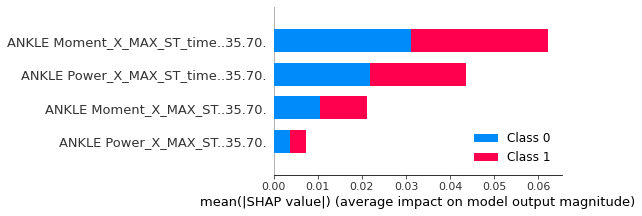

In [63]:
explainer = shap.KernelExplainer(model=svm.predict_proba,data=x_train,link="logit")
shap_values = explainer.shap_values(x_test) 
shap.summary_plot(shap_values, x_train, feature_names=result.columns, plot_type="bar")